#**LAPTOP PRICE PREDICTION MODEL**


Dataset:
https://github.com/Raghavagr/Laptop_Price_Prediction/blob/main/laptop_data.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
df.shape

(1303, 12)

In [ ]:
#checking for missing values
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
#checking for duplicate rows
df.duplicated().sum()


0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


ABOUT THE DATASET

1.Unnamed: 0 is an unnecessary column

2.Ram & Weight is in string format because units are given along with the values

3.Price can be converted to Integer.

<Axes: xlabel='Price', ylabel='Density'>

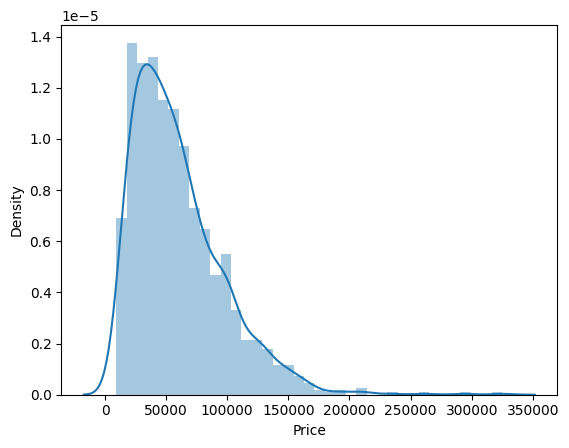

In [ ]:
sns.distplot(df['Price'])

#DATA PREPROCESSING

#1.Unnamed: 0

In [ ]:
#Dropping column Unnamed :0
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#2. 'Company' column.

In [ ]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

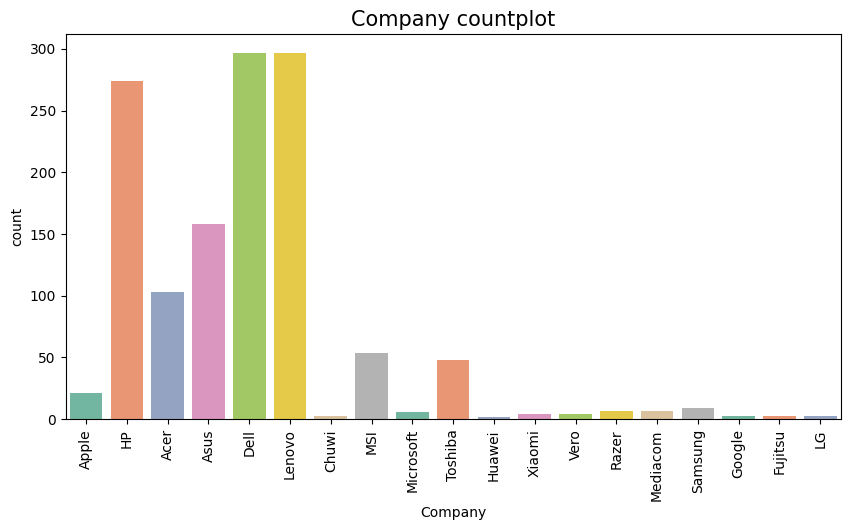

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Company',data=df,palette='Set2')
plt.xticks(rotation='vertical')
plt.title('Company countplot',size=15)
plt.show()


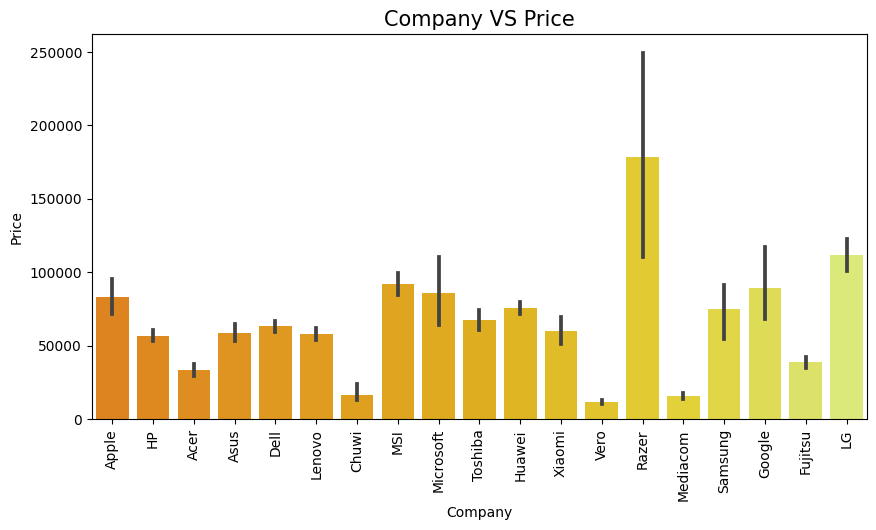

In [ ]:
#let's see average price of laptops of each 'Company'.
plt.figure(figsize=(10,5))
sns.barplot(x=df['Company'],y=df['Price'],palette='Wistia_r')
plt.xticks(rotation='vertical')
plt.title('Company VS Price',size=15)
plt.show()

In [ ]:
#Dell,Lenovo,HP,Asus,Acer are the most popular ones.
#There is variation in 'Price' with company.

#3.  ' TypeName ' column.

In [ ]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

Text(0.5, 1.0, 'TypeName Countplot')

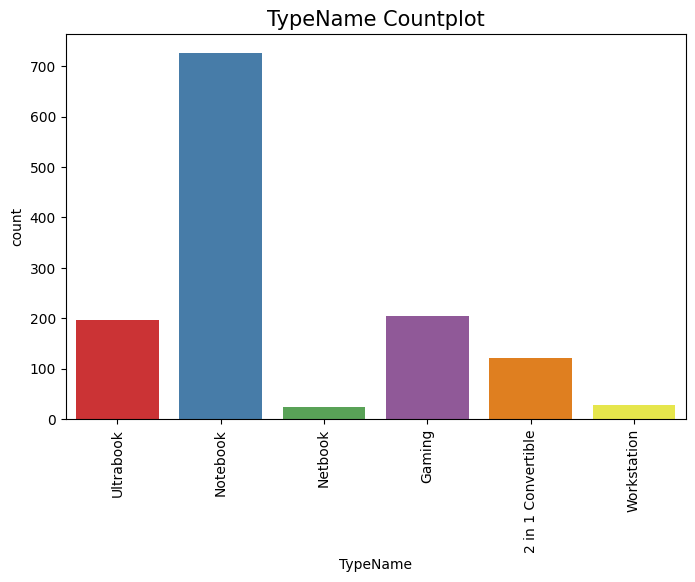

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='TypeName',data=df,palette='Set1')
plt.xticks(rotation='vertical')
plt.title('TypeName Countplot',size=15)


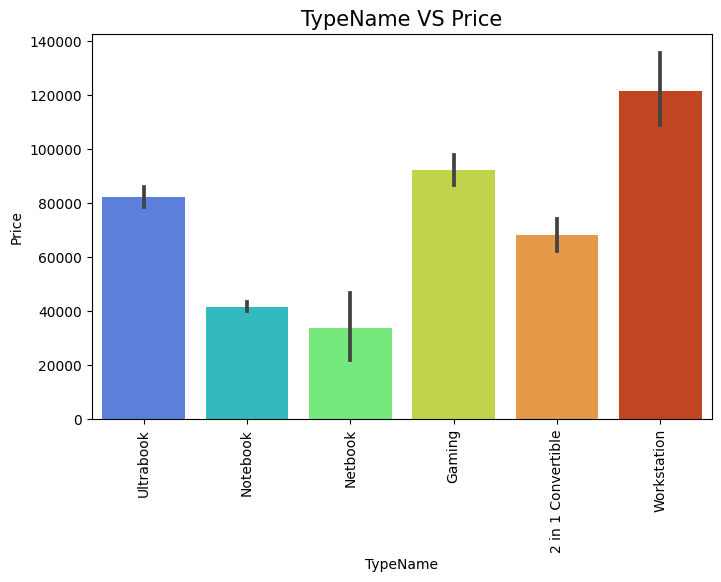

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['TypeName'],y=df['Price'],palette='turbo')
plt.xticks(rotation='vertical')
plt.title('TypeName VS Price',size=15)
plt.show()

In [ ]:
#there are 6 types of laptops.
#Notebook is the most sold laptop type succeeding Gaming,Ultrabook and 2 in 1 Convertible.
#type of laptops you are buying is affecting the price.

#4. 'Inches' column

In [ ]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

Text(0.5, 1.0, 'Inches Distribution')

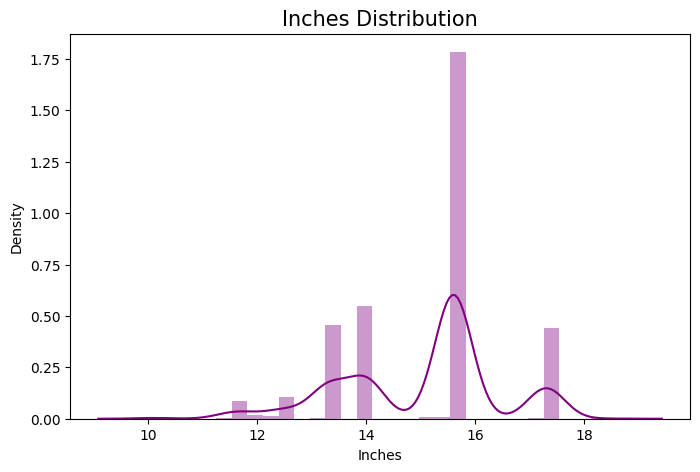

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(df['Inches'],color='purple')
plt.title('Inches Distribution',size=15)



Text(0.5, 1.0, 'Inches VS Price')

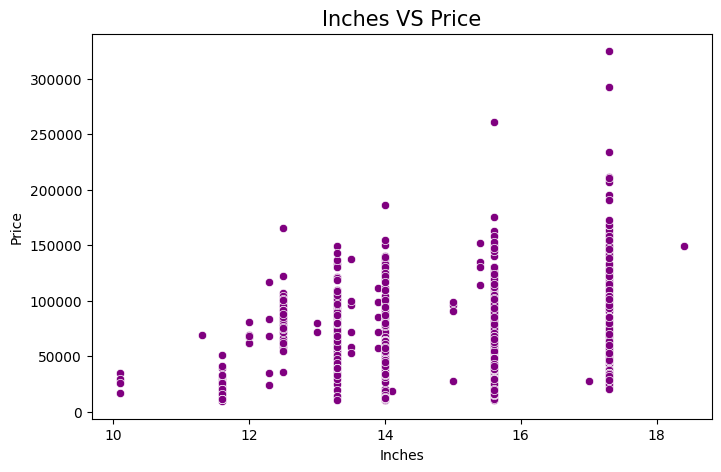

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Inches'],y=df['Price'],color='purple')
plt.title('Inches VS Price',size=15)

In [ ]:
df.corr() ['Price']

Inches    0.068197
Price     1.000000
Name: Price, dtype: float64

In [ ]:
#there is a very weak positive correlation between 'Inches' and 'Price'.

#5.  'Ram' column.

In [ ]:
#Removing GB from column 'Ram' and converting to integer.
df['Ram']=df['Ram'].str.replace('GB',' ')
df['Ram']=df['Ram'].astype('int32')

In [ ]:
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

Text(0.5, 1.0, 'Ram countplot')

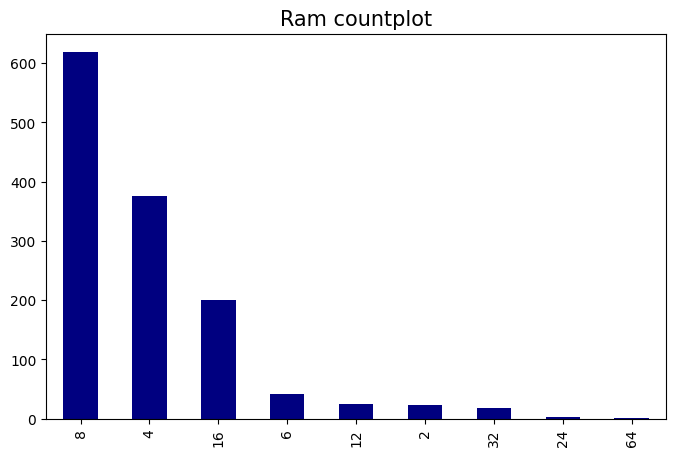

In [ ]:
plt.figure(figsize=(8,5))
df['Ram'].value_counts().plot(kind='bar',color='navy')
plt.title('Ram countplot',size=15)

[]

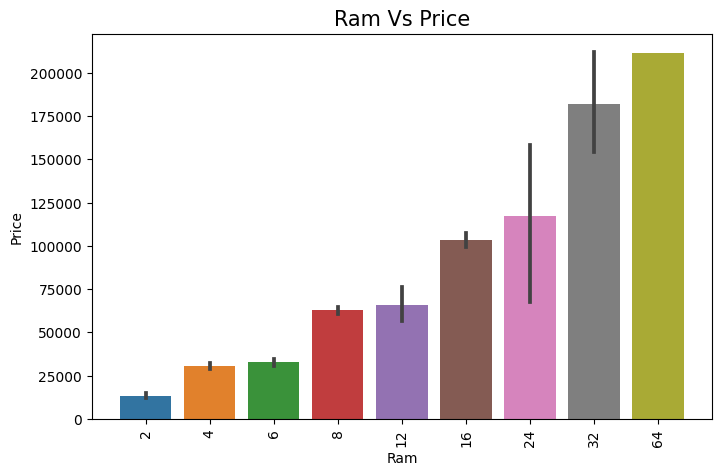

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title('Ram Vs Price',size=15)
plt.plot()

In [ ]:
df.corr() ['Price']

Inches    0.068197
Ram       0.743007
Price     1.000000
Name: Price, dtype: float64

In [ ]:
# clearly see a linear relationship between 'Ram' and 'Price'.

#6. 'Weight' column.

In [ ]:
#Removing unit 'kg' from column 'Weight' and converting to float.
df['Weight']=df['Weight'].str.replace('kg','')
df['Weight']=df['Weight'].astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
df['Weight'].value_counts()

2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: Weight, Length: 171, dtype: int64

Text(0.5, 1.0, 'Weight Distribution')

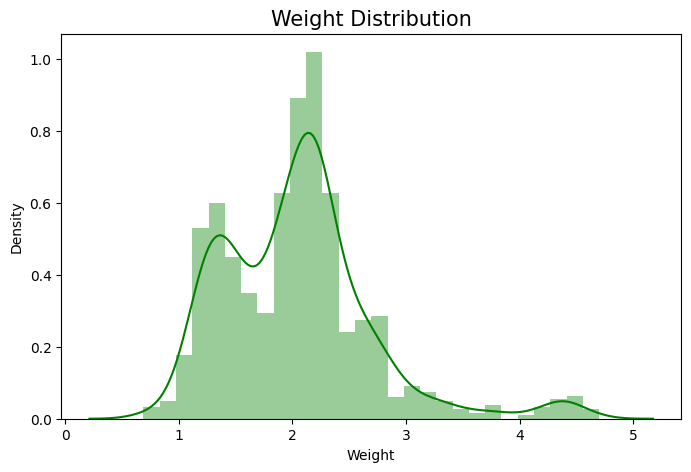

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(df['Weight'],color='green')
plt.title('Weight Distribution',size=15)

Text(0.5, 1.0, 'Weight VS Price')

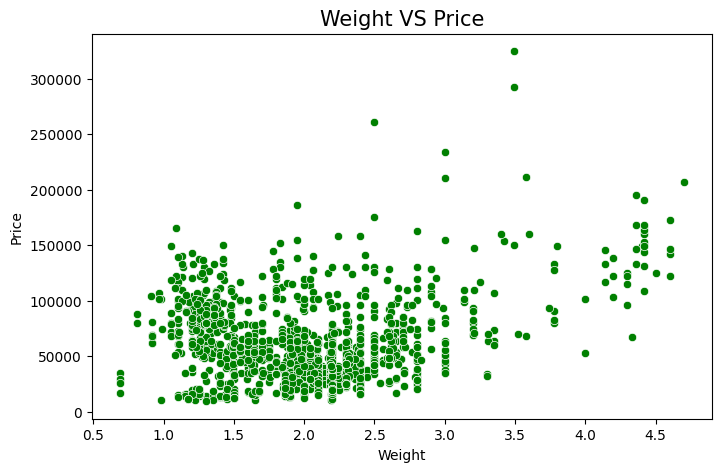

In [ ]:
#bimodal distribution
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Weight'],y=df['Price'],color='g')
plt.title('Weight VS Price',size=15)


In [ ]:
df.corr() ['Price']

Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
Name: Price, dtype: float64

#7.  'ScreenResolution'  column.

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [ ]:
#everything has screenresolution part
#Have Touchscreen or not
#Have IPS panel or not

#feature engineering on ScreenResolution

In [ ]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0 )
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1203,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.20,142790.4000,1
787,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,4,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,53226.7200,0
643,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050 Ti,No OS,2.50,62284.3200,0
253,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.37,98514.7200,1
1024,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,500GB HDD,Intel HD Graphics 520,Windows 10,2.09,55754.3232,0


In [ ]:
df['TouchScreen'].value_counts()

0    1111
1     192
Name: TouchScreen, dtype: int64

Text(0.5, 1.0, 'TouchScreen countplot')

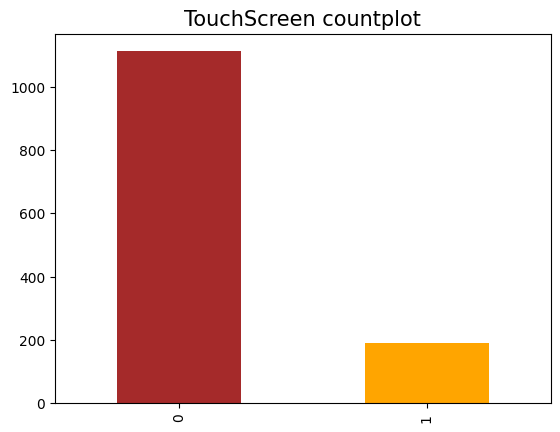

In [ ]:
df['TouchScreen'].value_counts().plot(kind='bar',color=['brown','orange'])
plt.title('TouchScreen countplot',size=15)

In [ ]:
# count of laptops having touchscreen is very small.

Text(0.5, 1.0, 'TouchScreen VS Price')

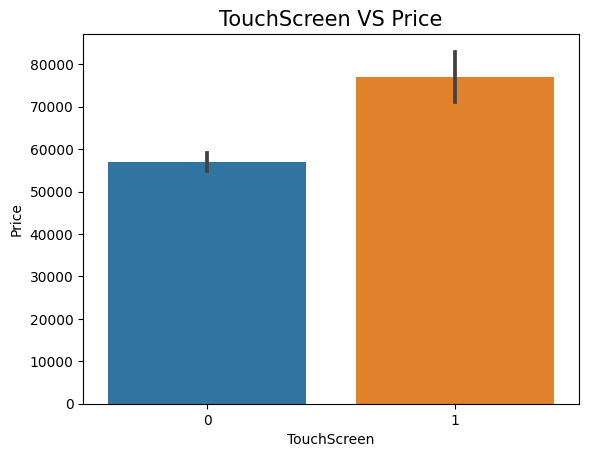

In [ ]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])
plt.title('TouchScreen VS Price',size=15)

In [ ]:
#touch screen feature is affecting the price of laptop.

In [ ]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [ ]:
df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

Text(0.5, 1.0, 'IPS Countplot')

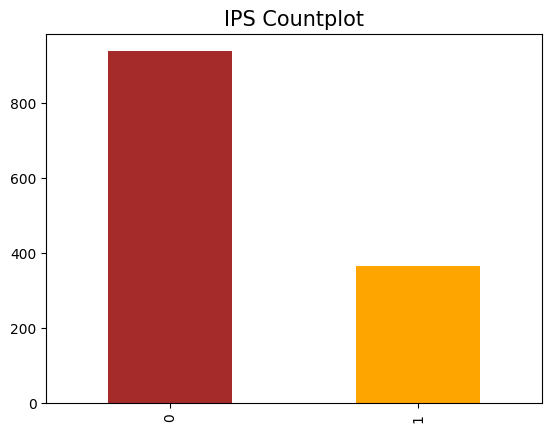

In [ ]:
df['IPS'].value_counts().plot(kind='bar',color=['brown','orange'])
plt.title('IPS Countplot',size=15)

In [ ]:
#laptops not having IPS is high in number.

Text(0.5, 1.0, 'IPS Vs Price')

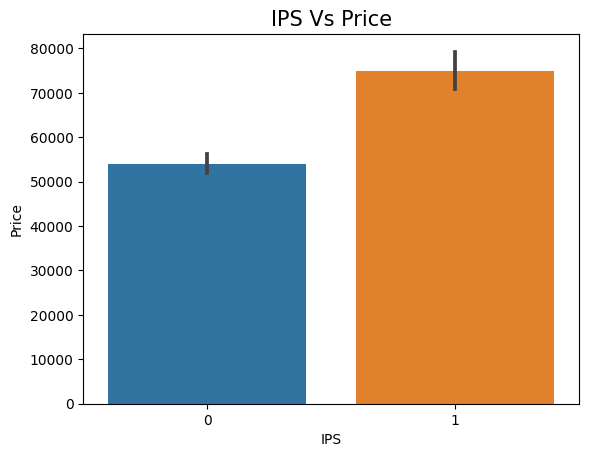

In [ ]:
sns.barplot(x=df['IPS'],y=df['Price'])
plt.title('IPS Vs Price',size=15)


In [ ]:
#this column is affecting the price.

In [ ]:
#extracting Resolution
def Xres_finder(s):
  return s.split()[-1].split('x')[0]
def Yres_finder(s):
  return s.split()[-1].split('x')[1]

#finding X & Y Resolution from ScreenResolution
df['X_res']=df['ScreenResolution'].apply(lambda x: Xres_finder(x))
df['Y_res']=df['ScreenResolution'].apply(lambda y: Yres_finder(y))

In [ ]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
df.drop(columns=['ScreenResolution'],inplace=True)
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


Text(0.5, 1.0, 'X_Resolution countplot')

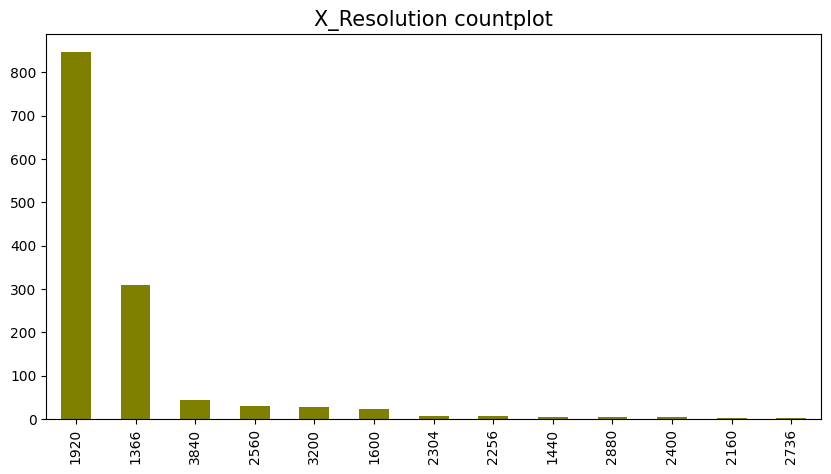

In [ ]:
plt.figure(figsize=(10,5))
df['X_res'].value_counts().plot(kind='bar',color='olive')
plt.title('X_Resolution countplot',size=15)

[]

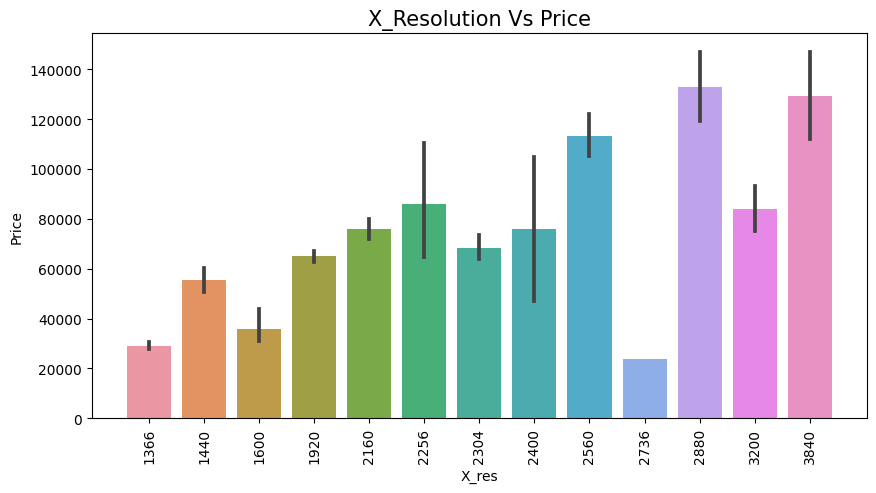

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['X_res'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title('X_Resolution Vs Price',size=15)
plt.plot()

In [ ]:
#X resolution is affecting price.

Text(0.5, 1.0, 'Y_Resolution countplot')

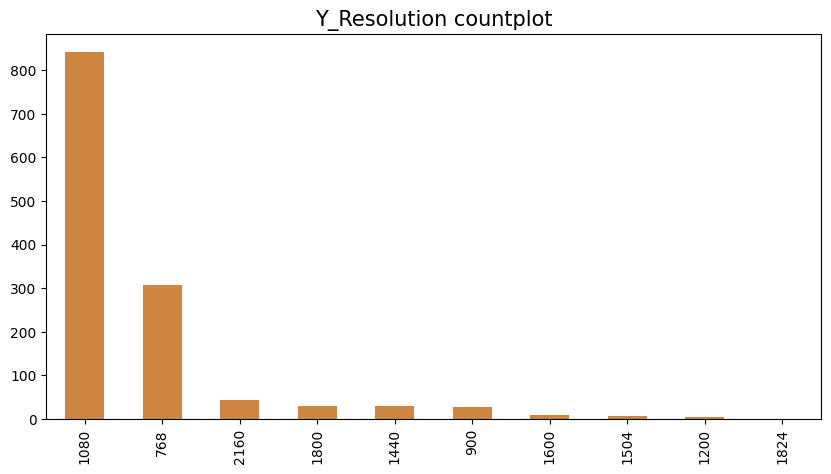

In [ ]:
plt.figure(figsize=(10,5))
df['Y_res'].value_counts().plot(kind='bar',color='peru')
plt.title('Y_Resolution countplot',size=15)

[]

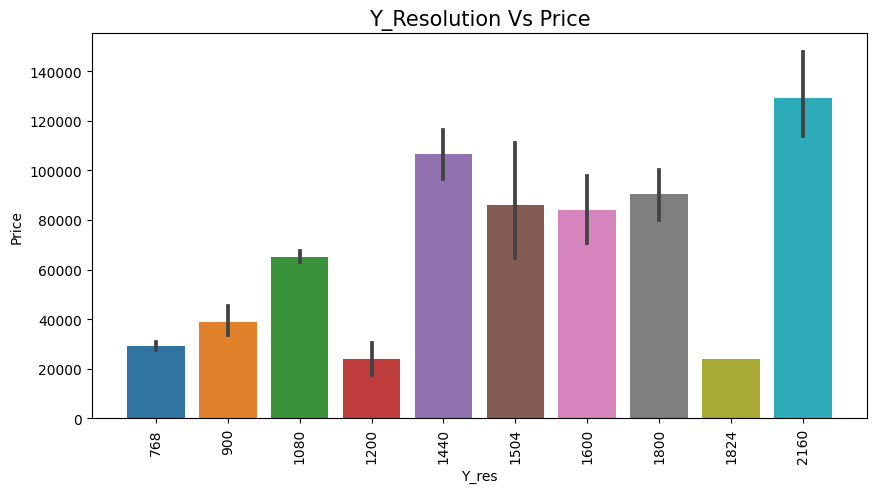

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Y_res'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title('Y_Resolution Vs Price',size=15)
plt.plot()

In [ ]:
df.corr() ['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [ ]:
df['ppi']=(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.corr() ['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
ppi            0.473487
IPS            0.252208
Weight         0.210370
TouchScreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [ ]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005


#8. 'CPU' column.

In [ ]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

#feature engineering on CPU column

---



In [ ]:
df['Cpu_Name']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
#unique names
df['Cpu_Name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

In [ ]:
def fetch_processor(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
    return text
  else:
    if text.split()[0]=='Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

Text(0.5, 1.0, 'CPU brand countplot')

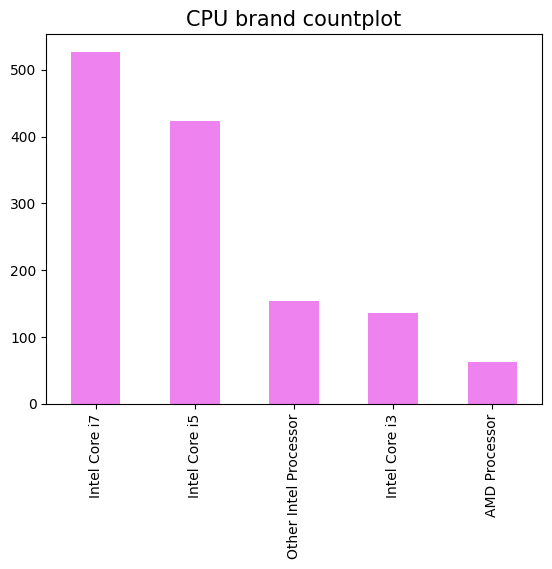

In [ ]:
df['Cpu_brand']=df['Cpu_Name'].apply(fetch_processor)
df['Cpu_brand'].value_counts().plot(kind='bar',color='violet')
plt.title('CPU brand countplot',size=15)

Text(0.5, 1.0, 'CPU brand Vs Price')

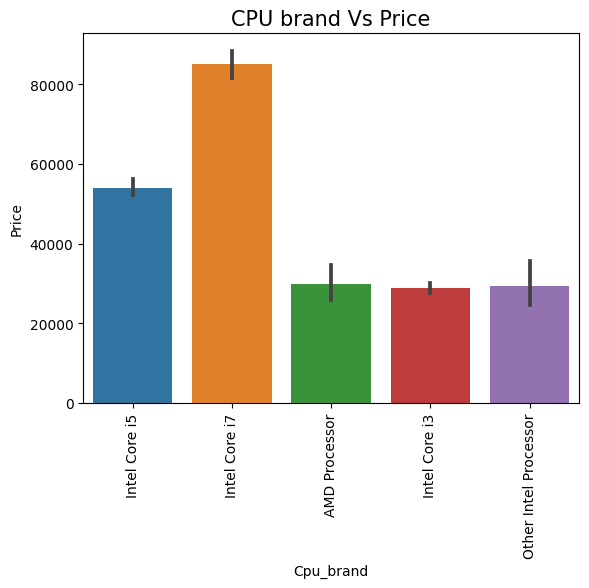

In [ ]:
sns.barplot(x=df['Cpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title('CPU brand Vs Price',size=15)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_Name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [ ]:
df.drop(columns=['Cpu','Cpu_Name'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


#9. 'Memory' column

In [ ]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
df['Memory']=df['Memory'].astype(str).replace('.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')
new=df['Memory'].str.split('+',n=1,expand=True)
df['part1']=new[0]


In [ ]:
df['part1']=df['part1'].str.strip()
df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,part1
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD


In [ ]:
df['part2']=new[1]
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,part1,part2,HDD1,SSD1,Hybrid1,Flash_storage1
649,Lenovo,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.36,84395.5200,0,1,176.232574,Intel Core i7,256,None,0,1,0,0
713,Asus,Notebook,4,32 Flash Storage,Intel HD Graphics 500,Windows 10,1.50,15877.4400,0,0,157.350512,Other Intel Processor,32,None,0,0,0,1
347,Dell,Ultrabook,16,512 SSD + 256 SSD,Intel UHD Graphics 620,Windows 10,1.88,85672.1088,0,0,141.211998,Intel Core i7,512,256 SSD,0,1,0,0
108,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,69210.7200,0,0,141.211998,Intel Core i7,256,1000 HDD,0,1,0,0
992,Lenovo,Notebook,4,128 SSD,Intel HD Graphics 500,No OS,1.90,14418.6336,0,0,100.454670,Other Intel Processor,128,None,0,1,0,0


In [ ]:
df['HDD1']=df['part1'].apply(lambda x: 1 if 'HDD' in x else 0)
df['SSD1']=df['part1'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Hybrid1']=df['part1'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Flash_storage1']=df['part1'].apply(lambda x: 1 if 'Flash Storage' in x else 0)


In [ ]:
df['part1']=df['part1'].str.replace(r'\D','')
df.sample(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,part1,part2,HDD1,SSD1,Hybrid1,Flash_storage1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,141.211998,Intel Core i5,256,None,0,1,0,0
903,Lenovo,Ultrabook,8,256 Flash Storage,Intel HD Graphics 620,Windows 10,1.13,109170.72,0,1,157.350512,Intel Core i7,256,None,0,0,0,1
411,Lenovo,Ultrabook,8,512 SSD,Nvidia GeForce GT 940MX,Windows 10,1.70,103523.04,0,1,209.800683,Intel Core i7,512,None,0,1,0,0


In [ ]:
df['part2'].fillna('0',inplace=True)

In [ ]:
df['HDD2']=df['part2'].apply(lambda x: 1 if 'HDD' in x else 0)
df['SSD2']=df['part2'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Hybrid2']=df['part2'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Flash_storage2']=df['part2'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [ ]:
df['part2']=df['part2'].str.replace(r'\D','')

In [ ]:
df['part1']=df['part1'].astype(int)
df['part2']=df['part2'].astype(int)

In [ ]:
df['HDD']=(df['part1']*df['HDD1']+df['part2']*df['HDD2'])
df['SSD']=(df['part1']*df['SSD1']+df['part2']*df['SSD2'])
df['Hybrid']=(df['part1']*df['Hybrid1']+df['part2']*df['Hybrid2'])
df['Flash_storage']=(df['part1']*df['Flash_storage1']+df['part2']*df['Flash_storage2'])
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,Hybrid1,Flash_storage1,HDD2,SSD2,Hybrid2,Flash_storage2,HDD,SSD,Hybrid,Flash_storage
706,Acer,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,53226.72,1,1,...,0,0,0,0,0,0,0,256,0,0
576,Toshiba,Ultrabook,16,512 SSD,Intel HD Graphics 620,Windows 10,1.24,99367.20,1,0,...,0,0,0,0,0,0,0,512,0,0
621,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 7,1.65,78055.20,0,0,...,0,0,0,0,0,0,0,256,0,0
274,Toshiba,Notebook,8,0 HDD,Nvidia GeForce 930M,Windows 10,2.20,43263.36,0,0,...,0,0,0,0,0,0,0,0,0,0
863,Lenovo,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,No OS,2.50,54185.76,0,1,...,0,0,0,0,0,0,1000,0,0,0


In [ ]:
df.drop(columns=['part1','part2','HDD1','SSD1','Hybrid1','Flash_storage1','HDD2','SSD2','Hybrid2','Flash_storage2','Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_storage
686,HP,Notebook,4,AMD Radeon 520,Windows 10,1.86,32639.8608,0,0,100.454670,Intel Core i5,0,0,0,0
1084,Dell,Notebook,8,Intel HD Graphics 620,Windows 10,2.18,39960.0000,0,0,141.211998,Intel Core i5,0,256,0,0
184,Xiaomi,Notebook,8,Nvidia GeForce MX150,No OS,1.95,63882.7200,0,1,141.211998,Intel Core i5,0,256,0,0
836,Asus,Gaming,16,Nvidia GeForce GTX 1070,Windows 10,2.90,128884.3200,0,0,127.335675,Intel Core i7,1000,256,0,0
499,Lenovo,Notebook,8,Intel HD Graphics 620,Windows 10,2.30,48538.0800,0,1,141.211998,Intel Core i5,0,256,0,0


In [ ]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.026830
SSD              0.666734
Hybrid           0.008811
Flash_storage   -0.040511
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['Hybrid','Flash_storage'],inplace=True)

#10. 'GPU' column.

In [ ]:
df['Gpu_brand']=df['Gpu'].apply(lambda x: x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

Text(0.5, 1.0, 'GPU brand countplot')

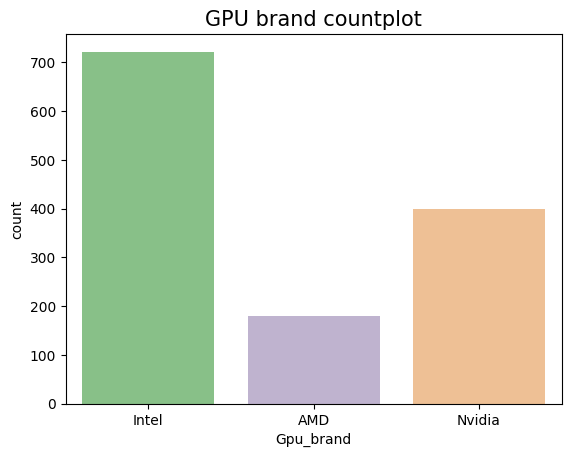

In [ ]:
df=df[df['Gpu_brand']!='ARM']
sns.countplot(x='Gpu_brand',data=df,palette='Accent')
plt.title('GPU brand countplot',size=15)

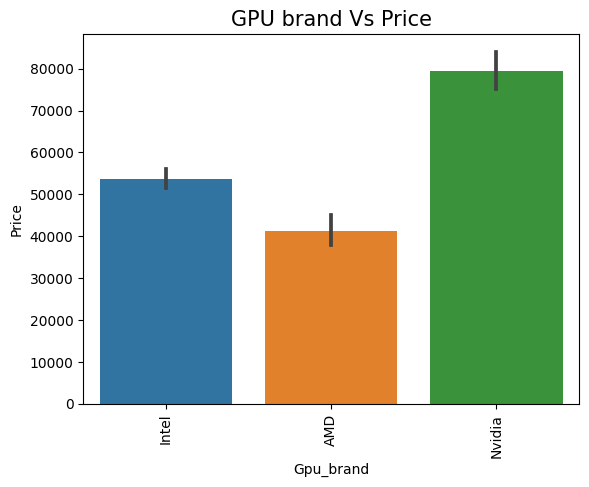

In [ ]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title('GPU brand Vs Price',size=15)
plt.show()

In [ ]:
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


#11. 'OpSys' column

In [ ]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

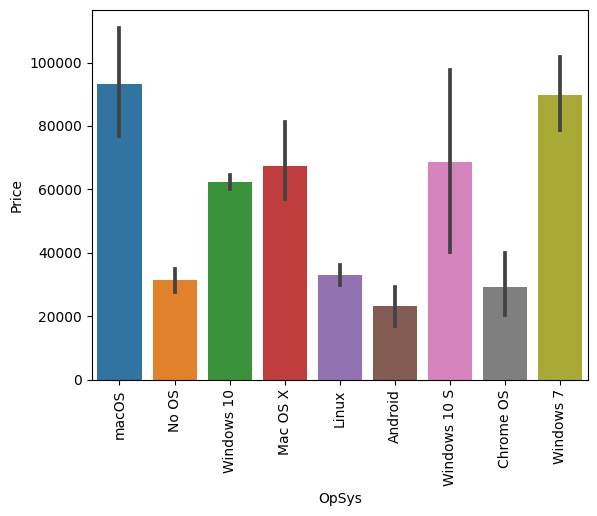

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def cat_os(inp):
  if inp=='Windows 10' or inp=='Windows 7' or inp=='Windows 10 S':
    return 'Windows'
  elif inp=='Mac OS X ' or inp=='macOS':
    return 'Mac'
  else:
    return 'Linux/No OS/Others'

In [ ]:
df['OS']=df['OpSys'].apply(cat_os)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/No OS/Others
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
df.drop(['OpSys'],axis=1,inplace=True)
df.head()


,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/No OS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
df['OS'].value_counts()

Windows               1125
Linux/No OS/Others     164
Mac                     13
Name: OS, dtype: int64

#12.'Price' column

In [ ]:
df['Price']=df['Price'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float64
 4   Price        1302 non-null   int32  
 5   TouchScreen  1302 non-null   int64  
 6   IPS          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu_brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu_brand    1302 non-null   object 
 12  OS           1302 non-null   object 
dtypes: float64(2), int32(2), int64(4), object(5)
memory usage: 132.2+ KB


<Axes: xlabel='Price', ylabel='Density'>

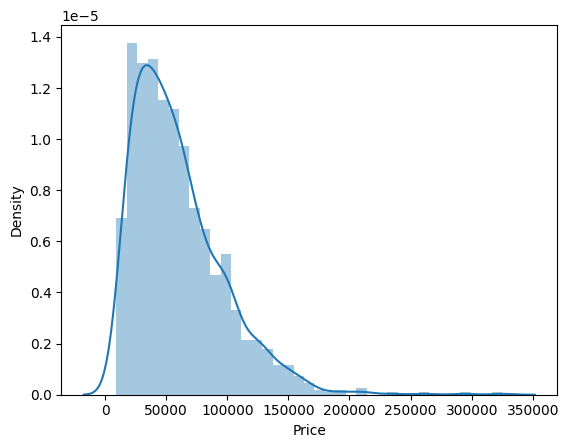

In [ ]:
#visualizing the distribution of the target column.
sns.distplot(df['Price'])

In [ ]:
#distribution of target column is right-skewed.

#log transformation

<Axes: xlabel='Price', ylabel='Density'>

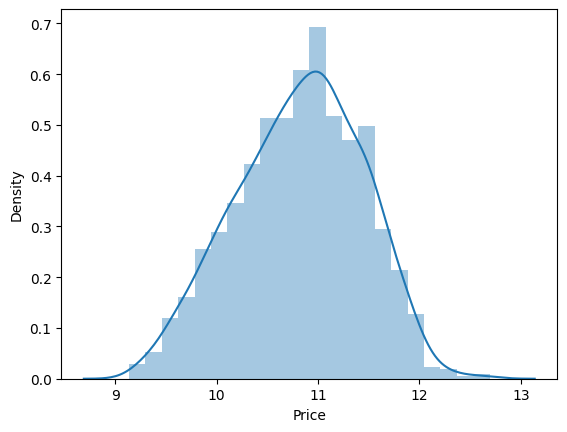

In [ ]:
sns.distplot(np.log(df['Price']))

In [ ]:
#Viewing the dataset.
df.head(3)

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/No OS/Others


#seperating numerical and categorical columns

In [ ]:
num_col=[i for i in df.columns if df[i].dtype!="object"]
num_col

['Ram', 'Weight', 'Price', 'TouchScreen', 'IPS', 'ppi', 'HDD', 'SSD']

In [ ]:
cat_col=[i for i in df.columns if df[i].dtype=="object"]
cat_col

['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'OS']

#NUMERICAL COLUMNS DATAFRAME

In [ ]:
num_df=df.drop(columns=['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'OS'])
num_df.head()

,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD
0,8,1.37,71378,0,1,226.983005,0,128
1,8,1.34,47895,0,0,127.677940,0,0
2,8,1.86,30636,0,0,141.211998,0,256
3,16,1.83,135195,0,1,220.534624,0,512
4,8,1.37,96095,0,1,226.983005,0,256


<Axes: >

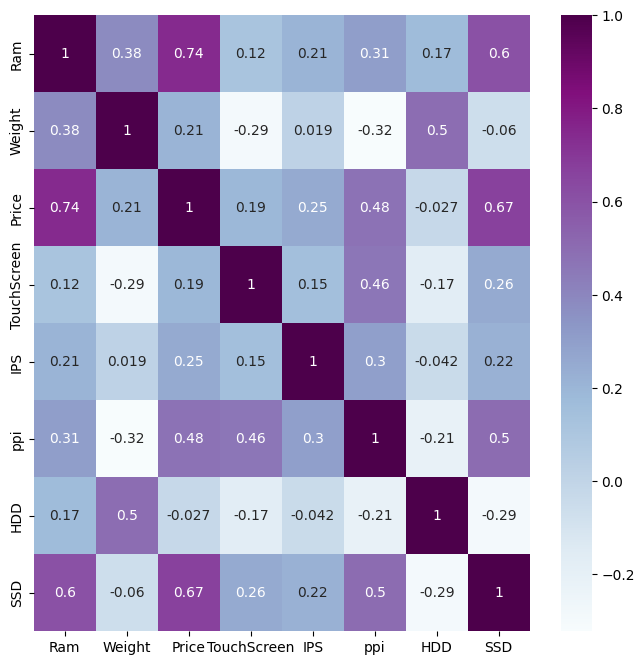

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(num_df.corr(),annot=True,cmap='BuPu')

#ENCODING CATEGORICAL COLUMNS

In [ ]:
dummy_df=pd.get_dummies(df[['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'OS']],drop_first=True)
dummy_df.head()

,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,OS_Mac,OS_Windows
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


#FINAL DATASET

In [ ]:
df1=pd.concat([num_df,dummy_df],axis=1)
df1.head()

,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,OS_Mac,OS_Windows
0,8,1.37,71378,0,1,226.983005,0,128,1,0,...,1,0,0,1,0,0,1,0,1,0
1,8,1.34,47895,0,0,127.677940,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
2,8,1.86,30636,0,0,141.211998,0,256,0,0,...,0,0,0,1,0,0,1,0,0,0
3,16,1.83,135195,0,1,220.534624,0,512,1,0,...,1,0,0,0,1,0,0,0,1,0
4,8,1.37,96095,0,1,226.983005,0,256,1,0,...,1,0,0,1,0,0,1,0,1,0


#seperating input variables and output variables

In [ ]:
x=df1.drop(columns=['Price'])
x.head()

,Ram,Weight,TouchScreen,IPS,ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,OS_Mac,OS_Windows
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,1,0,0,1,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,1,0,0,1,0,1,0


In [ ]:
y=np.log(df1['Price'])
y.head()

0    11.175745
1    10.776766
2    10.329931
3    11.814473
4    11.473093
Name: Price, dtype: float64

#Split in train and test dataset.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print('size of x_train datset =',x_train.shape)
print('size of x_test datset =',x_test.shape)
print('size of y_train datset =',y_train.shape)
print('size of y_test datset =',y_test.shape)

size of x_train datset = (911, 38)
size of x_test datset = (391, 38)
size of y_train datset = (911,)
size of y_test datset = (391,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


#MACHINE LEARNING MODELS FOR LAPTOP PRICE PREDICTION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
reg=LinearRegression()
knr=KNeighborsRegressor(n_neighbors= 3)
svr=SVR()
tree=DecisionTreeRegressor()
rf=RandomForestRegressor()


# LINEAR REGRESSION

In [ ]:
reg.fit(x_train,y_train)
y_pred1=reg.predict(x_test)
r2_score_reg=r2_score(y_test,y_pred1)
print('RMSE=',np.sqrt(mean_squared_error(y_test,y_pred1)))
print('MAPE =',mean_absolute_percentage_error(y_test,y_pred1))
print('R2-score',r2_score_reg)

RMSE= 0.28289603190471413
MAPE = 0.02007543657776091
R2-score 0.7964983016423968


#KNN

In [ ]:
knr.fit(x_train_scaled,y_train)
y_pred2=knr.predict(x_test_scaled)
r2_score_knn=r2_score(y_test,y_pred2)
print('RMSE=',np.sqrt(mean_squared_error(y_test,y_pred2)))
print('MAE =',mean_absolute_percentage_error(y_test,y_pred2))
print('R2-score',r2_score_knn)

RMSE= 0.2861642437637264
MAE = 0.02010387064721762
R2-score 0.7917691548146962


#SVM

In [ ]:
svr.fit(x_train_scaled,y_train)
y_pred3=svr.predict(x_test_scaled)
r2_score_svm=r2_score(y_test,y_pred3)
print('RMSE=',np.sqrt(mean_squared_error(y_test,y_pred3)))
print('MAE =',mean_absolute_percentage_error(y_test,y_pred3))
print('R2-score',r2_score_svm)

RMSE= 0.23494299621422973
MAE = 0.01625146499352067
R2-score 0.8596413015132682


#DECISION TREE

In [ ]:
tree.fit(x_train,y_train)
y_pred4=tree.predict(x_test)
r2_score_tree=r2_score(y_test,y_pred4)
print('RMSE=',np.sqrt(mean_squared_error(y_test,y_pred4)))
print('MAE =',mean_absolute_percentage_error(y_test,y_pred4))
print('R2-score',r2_score_tree)

RMSE= 0.2791896197227496
MAE = 0.01897455826811379
R2-score 0.8017957964569977


#RANDOM FOREST

In [ ]:
rf.fit(x_train,y_train)
y_pred5=rf.predict(x_test)
r2_score_rf=r2_score(y_test,y_pred5)
print('RMSE=',np.sqrt(mean_squared_error(y_test,y_pred5)))
print('MAE =',mean_absolute_percentage_error(y_test,y_pred5)) #RMSE
print('R2-score',r2_score(y_test,y_pred5))

RMSE= 0.2269811534338396
MAE = 0.01565145188780138
R2-score 0.8689931743313813


COMPARING THE TRUE & PREDICTED Y_VALUES OF DIFFERENT REGRESSION MODELS USING SCATTERPLOTS.

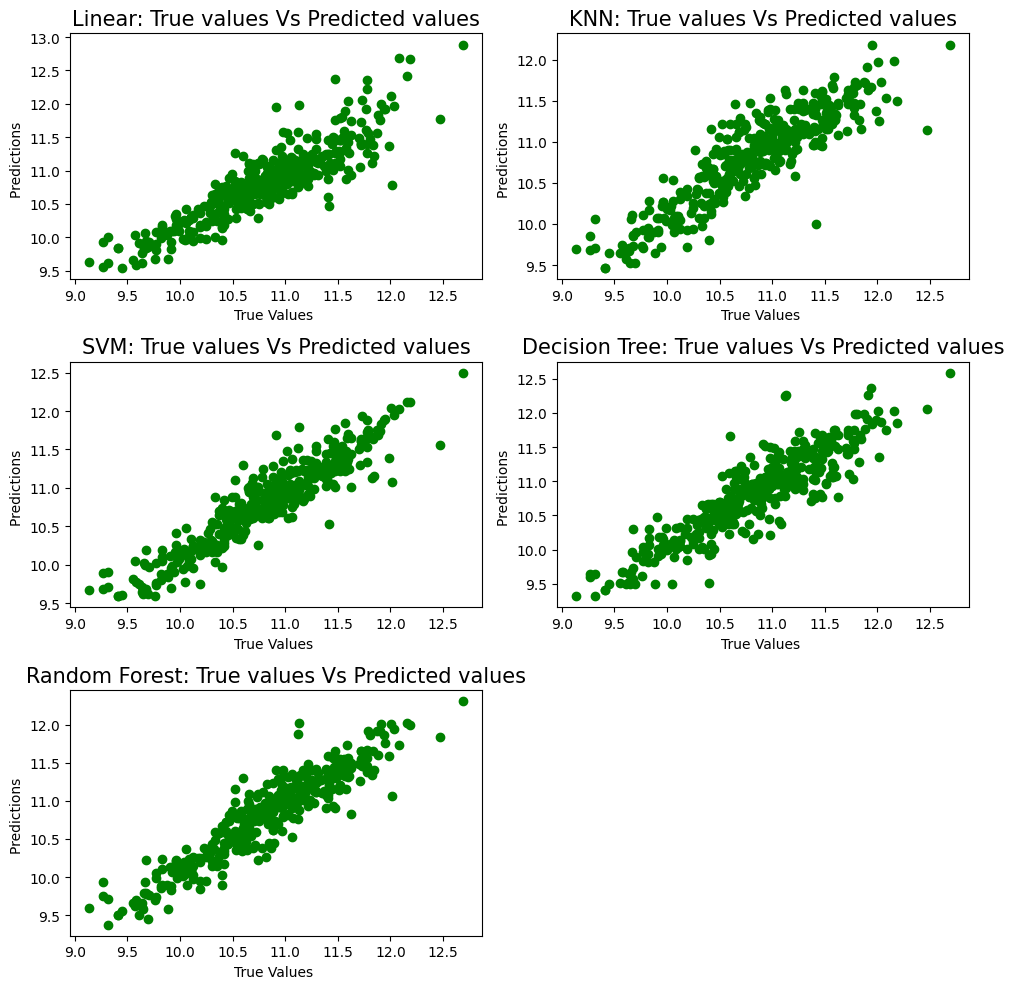

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
plt.subplot(3,2,1)
plt.scatter(y_test,y_pred1,color='g')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.title('Linear: True values Vs Predicted values',size=15)

plt.subplot(3,2,2)
plt.scatter(y_test,y_pred2,color='g')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.title('KNN: True values Vs Predicted values',size=15)

plt.subplot(3,2,3)
plt.scatter(y_test,y_pred3,color='g')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.title('SVM: True values Vs Predicted values',size=15)

plt.subplot(3,2,4)
plt.scatter(y_test,y_pred4,color='g')
plt.xlabel('True Values ',size=10)
plt.ylabel('Predictions ',size=10)
plt.title('Decision Tree: True values Vs Predicted values',size=15)

plt.subplot(3,2,5)
plt.scatter(y_test,y_pred5,color='g')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.title('Random Forest: True values Vs Predicted values',size=15)

plt.tight_layout()
fig.delaxes(axes[2,1])
plt.show()


#comparing the accuracy of Regression models

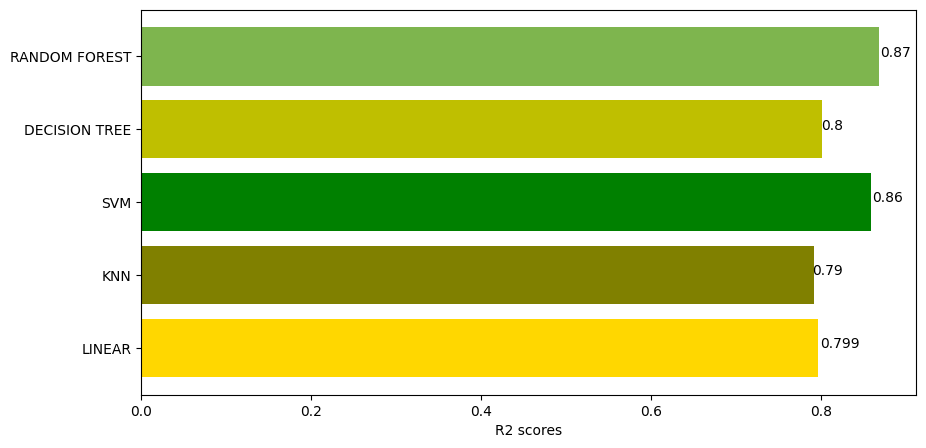

In [ ]:
x_lst=['LINEAR','KNN','SVM','DECISION TREE','RANDOM FOREST']
y_lst=[r2_score_reg,r2_score_knn,r2_score_svm,r2_score_tree,r2_score_rf]
plt.figure(figsize=(10,5))
plt.xlabel('R2 scores')
plt.barh(x_lst,y_lst,color=['gold','olive', 'green', 'y', '#7eb54e'])
scores=[0.799,0.79,0.86,0.80,0.87]
for index, value in enumerate(scores):
    plt.text(value, index,
             str(value))

plt.show()


In [ ]:
#The best accuracy is got from Random Forest.